In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import tqdm
import multiprocessing as mp
from config import *

path = result_parent_directory + os.sep + 'step4a_btms_sizing_sensitivity_c_rate'

result_directory = path + os.sep + 'analysis'
os.makedirs(result_directory, exist_ok=True)
figure_directory = path + os.sep + 'figures'
os.makedirs(figure_directory, exist_ok=True)

sizing_results_path = os.path.join(path, 'sizing_results')

load results 

In [9]:
# load all results from path to list and add taz name as df name
sizing_results = []
sizing_results_params = []
for folder in os.listdir(sizing_results_path):
    sizing_results_one_param_combination = []
    for file in os.listdir(sizing_results_path + os.sep + folder):
        if file.startswith('btms_sizing'):
            if file.endswith(".csv"):
                df0 = pd.read_csv(os.path.join(sizing_results_path, folder, file), index_col=0)
                name = file.split('.')[0]
                #remove btms_sizing from name
                df0.name = name.split('_')[2]
                sizing_results_one_param_combination.append(df0)
    sizing_results.append(sizing_results_one_param_combination)

In [10]:
for combination in sizing_results:
    print(combination[0].columns[-1])
#recognize parameters for each result in sizing_results
sizing_results_params = []
for x in sizing_results:
    df0 = x[0]
    a = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][1]
    b_sys = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][2]
    b_cap = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][3]
    b_loan = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][4]
    c = df0['param: btms size, a,b_sys,b_cap,b_loan,c'][5]
    param_dict= {'a': [a], 'b_sys': [b_sys], 'b_cap': [b_cap], 'b_loan':[b_loan], 'c': [c]}
    sizing_results_params.append(pd.DataFrame(param_dict))

param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c
param: btms size, a,b_sys,b_cap,b_loan,c


In [11]:
#
df_params = pd.concat(sizing_results_params, axis=0)
df_params.index = df_params['a'] * 365/12
#df_params.sort_index(inplace=True)
df_params.index.argmax()

3

In [12]:
# create a list of all a values
a_values = []
for x in sizing_results_params:
    a_values.append(x['a'].values[0])
# create an idx list for sorting
a_values_idx = np.argsort(a_values)
# sort sizing_results and sizing_results_params
sizing_results = [sizing_results[i] for i in a_values_idx]
sizing_results_params = [sizing_results_params[i] for i in a_values_idx]

In [13]:
# show all a values multiplied by 365/12
a_values = [x['a'].values[0] for x in sizing_results_params]
a_values = [x*365/12 for x in a_values]
# round to 2 decimal places
a_values = [round(x, 2) for x in a_values]
print(a_values)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0]


In [14]:
from functions.stats_sizing_function import stats_sizing_function
# create df with stats for each parameter combination and each taz
stats_per_param_combination_list = []
for sizing_results_one_param_combination in sizing_results:
    stats = pd.DataFrame()
    for df0 in sizing_results_one_param_combination:
        stats = stats.append(pd.DataFrame(stats_sizing_function(df0, timestep), index=[df0.name]))
    stats_per_param_combination_list.append(stats)

In [15]:
stats_per_param_combination = pd.concat(stats_per_param_combination_list, keys=a_values)

In [16]:
# show stats for a = 1
stats_per_param_combination.loc[10].describe()

,btms_size,cost_a,cost_b_sys,cost_b_cap,cost_b_loan,cost_b,cost_c,cost_total,share_cost_a,share_cost_b_sys,...,share_cost_b_loan,share_cost_b,share_cost_c,E_Charge,c_rate,cycles_day,btms_ratio,load_factor,btms_peak_to_grid_ratio,grid_peak_to_charge_peak_ratio
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,...,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,288.615678,11.852301,19.817360,14.954810,6.035374,34.772170,11.645283,58.269755,0.183506,0.369020,...,0.101552,0.620652,0.195842,683.684094,1.639622,1.906685,0.863682,0.967052,18.993906,0.073166
std,102.092595,9.952876,7.730321,6.976650,2.815595,12.750375,5.454396,25.807944,0.064424,0.124843,...,0.018229,0.087013,0.035163,441.610667,0.417400,0.723377,0.099374,0.094734,15.272600,0.049376
min,71.575190,0.708325,6.189802,1.188625,0.479698,9.841876,0.920612,14.922015,0.045127,0.111183,...,0.030561,0.356891,0.058651,44.000000,0.538805,0.293285,0.332483,0.543785,2.215141,0.007182
25%,214.685203,6.094913,12.349002,9.562589,3.859213,24.131608,7.445391,40.264988,0.148746,0.283222,...,0.092444,0.565844,0.178409,382.416667,1.322806,1.453580,0.834505,0.999999,10.005262,0.043052
50%,289.383959,10.354989,20.797221,15.527900,6.266658,35.004584,12.019687,57.510346,0.173455,0.358881,...,0.104072,0.620570,0.200039,651.916667,1.838841,1.753991,0.878088,1.000000,15.811349,0.059484
75%,346.263710,13.975268,24.575555,19.771272,7.979173,43.258603,15.332778,72.907607,0.204683,0.443602,...,0.113809,0.667742,0.218996,878.083333,2.000000,2.268342,0.929953,1.000000,22.227505,0.090866
max,599.999996,78.904178,51.887831,43.726170,17.646749,95.614001,34.701470,179.630542,0.509234,0.820496,...,0.133640,0.896222,0.263156,2957.166667,2.000000,5.228914,0.992655,1.000000,138.244276,0.311028


In [17]:
stats_per_param_combination.loc[1].describe()

,btms_size,cost_a,cost_b_sys,cost_b_cap,cost_b_loan,cost_b,cost_c,cost_total,share_cost_a,share_cost_b_sys,...,share_cost_b_loan,share_cost_b,share_cost_c,E_Charge,c_rate,cycles_day,btms_ratio,load_factor,btms_peak_to_grid_ratio,grid_peak_to_charge_peak_ratio
count,1.570000e+02,157.000000,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,157.000000,1.570000e+02,1.570000e+02,...,1.570000e+02,1.570000e+02,1.570000e+02,157.000000,157.000000,157.000000,1.570000e+02,157.000000,1.570000e+02,1.570000e+02
mean,2.150460e-05,16.253032,2.487541e-07,7.553066e-08,3.048222e-08,3.242848e-07,5.873595e-08,16.253032,1.000000e+00,1.402738e-08,...,1.986013e-09,1.894844e-08,3.824919e-09,683.684094,0.275174,0.159803,5.765279e-09,0.058654,1.066549e-08,1.000000e+00
std,2.833521e-05,6.327021,3.542219e-07,8.903281e-08,3.593133e-08,4.344520e-07,6.917461e-08,6.327021,2.889314e-08,1.954851e-08,...,2.492700e-09,2.464378e-08,4.794713e-09,441.610667,0.185754,0.089765,9.428552e-09,0.031446,1.486339e-08,1.487212e-08
min,4.102434e-07,4.931507,3.961911e-10,1.185583e-09,4.784707e-10,1.581774e-09,9.207066e-10,4.931507,9.999999e-01,4.016938e-11,...,4.851161e-11,1.603744e-10,9.334941e-11,44.000000,0.006919,0.029606,7.548367e-11,0.006115,3.054212e-11,9.999999e-01
25%,3.273650e-06,9.863014,2.482253e-08,1.261919e-08,5.092778e-09,4.329738e-08,9.793991e-09,9.863014,1.000000e+00,2.004267e-09,...,3.058168e-10,3.012947e-09,5.936729e-10,382.416667,0.111283,0.093620,7.706599e-10,0.037202,1.523911e-09,1.000000e+00
50%,1.181226e-05,16.438356,8.931673e-08,3.407932e-08,1.375353e-08,1.297580e-07,2.645436e-08,16.438357,1.000000e+00,5.308190e-09,...,1.033541e-09,8.770683e-09,1.986367e-09,651.916667,0.258328,0.133456,2.803799e-09,0.051494,4.035994e-09,1.000000e+00
75%,3.041009e-05,19.726027,3.422878e-07,9.404588e-08,3.795448e-08,4.462099e-07,7.344444e-08,19.726028,1.000000e+00,1.735209e-08,...,2.565442e-09,2.368776e-08,4.964300e-09,878.083333,0.398341,0.220765,6.061958e-09,0.075224,1.319337e-08,1.000000e+00
max,1.900395e-04,44.383561,1.885332e-06,4.290987e-07,1.731731e-07,2.314431e-06,3.328877e-07,44.383562,1.000000e+00,9.557587e-08,...,1.389298e-08,1.173288e-07,2.671549e-08,2957.166667,0.796062,0.446217,6.538941e-08,0.186652,7.266954e-08,1.000000e+00


In [18]:
stats_per_param_combination.loc[0].columns

Index(['btms_size', 'cost_a', 'cost_b_sys', 'cost_b_cap', 'cost_b_loan',
       'cost_b', 'cost_c', 'cost_total', 'share_cost_a', 'share_cost_b_sys',
       'share_cost_b_cap', 'share_cost_b_loan', 'share_cost_b', 'share_cost_c',
       'E_Charge', 'c_rate', 'cycles_day', 'btms_ratio', 'load_factor',
       'btms_peak_to_grid_ratio', 'grid_peak_to_charge_peak_ratio'],
      dtype='object')

Text(0.5, 1.0, 'btms peak to grid ratio for each a value')

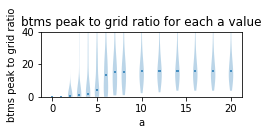

In [35]:
# get btms peak to grid ratio mean and std for each a value
btms_peak_to_grid_ratio_mean = []
btms_peak_to_grid_ratio_std = []
# for a in a_values:
#     btms_peak_to_grid_ratio_mean.append(stats_per_param_combination.loc[a]['btms_peak_to_grid_ratio'].mean())
#     btms_peak_to_grid_ratio_std.append(stats_per_param_combination.loc[a]['btms_peak_to_grid_ratio'].std())

# plot btms peak to grid ratio mean and std for each a value
# fig, ax = plt.subplots(figsize=(10, 5))
# ax.errorbar(a_values, btms_peak_to_grid_ratio_mean, yerr=btms_peak_to_grid_ratio_std, fmt='o')
# ax.set_xlabel('a')
# ax.set_ylabel('btms peak to grid ratio')
# ax.set_title('btms peak to grid ratio mean and std for each a value')

# plot violin plot for btms peak to grid ratio for each a value
plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(figsize=(plotSizeX, plotSizeY))
x = stats_per_param_combination['btms_peak_to_grid_ratio']
dists = [stats_per_param_combination.loc[i]['btms_peak_to_grid_ratio'] for i in a_values]
ax.violinplot(dists, a_values, showmeans=False, showextrema=False, showmedians=True)
ax.set_xlabel('a')
ax.set_ylim(0, 40)
ax.set_ylabel('btms peak to grid ratio')
ax.set_title('btms peak to grid ratio for each a value')


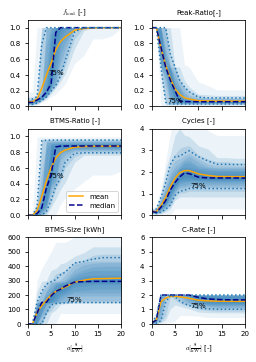

In [37]:
# make a plot of the stats over the a values for mu and sigma of the btms ratio
zoom =1
pltSettings()
fig, ax_arr = plt.subplots(3, 2, figsize=(zoom*plotSizeX, zoom*4.2*plotSizeY), sharex=True, sharey=False)
ax = ax_arr.flatten()

def plot_mean_median_color_area(ax, column, alpha):
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).mean(), label='mean', color='orange')
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).median(), label='median', color='darkblue', linestyle='--')
    for i in np.arange(0, 1, 0.05):
        ax.fill_between(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).quantile(i), stats_per_param_combination.loc[:, column].groupby(level=0).quantile(1-i), alpha=alpha,  color='C0', linewidth=0, rasterized=True)
    # add lines for 12.5% and 87.5% quantile
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).quantile(0.125), color='C0', linestyle=':')
    ax.plot(a_values, stats_per_param_combination.loc[:, column].groupby(level=0).quantile(0.875), color='C0', linestyle=':')
    # add text for 12.5% and 87.5% quantile
    # mark area with 75%
    if column == 'load_factor':
        x = 6
    elif column == 'btms_ratio':
        x = 6
    elif column == 'cost_a':
        x = 13
    elif column == 'grid_peak_to_charge_peak_ratio':
        x = 5
    else:
        x = 10
    y = stats_per_param_combination.loc[:, column].groupby(level=0).quantile(0.125).values[x+1]
    ax.text(x,y, '75%', horizontalalignment='center', verticalalignment='bottom') #, transform=ax.transAxes)
    # add x and y label
    #ax.set_ylabel(column)
    # add legend
    #ax.legend()
    ax.set_xlim(0, 20)

alpha = 0.08
plot_mean_median_color_area(ax[2], 'btms_ratio', alpha)
plot_mean_median_color_area(ax[5], 'c_rate', alpha)
plot_mean_median_color_area(ax[0], 'load_factor', alpha)
plot_mean_median_color_area(ax[3], 'cycles_day', alpha)
plot_mean_median_color_area(ax[4], 'btms_size', alpha)
plot_mean_median_color_area(ax[1], 'grid_peak_to_charge_peak_ratio', alpha)
           
# ax0
ax[2].set_ylim(0, 1.1)
ax[2].set_title('BTMS-Ratio [-]', fontsize = 7)
# ax1
ax[5].set_ylim(0, 6)
ax[5].set_title('C-Rate [-]', fontsize = 7)
# plot legend with rectangular shape
#ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=7)

# ax2
ax[0].set_ylim(0, 1.1)
ax[0].set_title(r'$f_\mathrm{load}$ [-]', fontsize = 7)
ax[2].legend(loc = 'lower right', fontsize = 7)
# ax3
ax[3].set_ylim(0, 4)
ax[3].set_title('Cycles [-]', fontsize = 7)

# ax4
ax[4].set_ylim(0, 600)
ax[4].set_title('BTMS-Size [kWh]', fontsize = 7)
ax[4].set_xlabel(r'$a [\frac{\$}{\mathrm{kW}}]$')
# ax5
ax[1].set_ylim(0, 1.1)
ax[1].set_title('Peak-Ratio[-]', fontsize = 7)
ax[5].set_xlabel(r'$a [\frac{\$}{\mathrm{kW}}]$ [-]')

fig.tight_layout()

# save plot
fig.savefig(os.path.join(figure_directory, 'step4a_stats_per_a_value.pdf'), dpi=300, bbox_inches='tight')

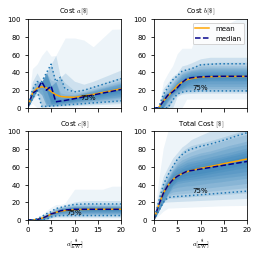

In [36]:
%matplotlib inline
plot_cols = ['cost_a','cost_b', 'cost_c', 'cost_total']
col_titles = [r'Cost $a [\$]$', r'Cost $b [\$]$', r'Cost $c [\$]$', r'Total Cost $[\$]$']
# make a plot of the stats over the a values for mu and sigma of the btms ratio
zoom =1
pltSettings()
fig, ax_arr = plt.subplots(2,2, figsize=(zoom*plotSizeX, zoom*2*1.5*plotSizeY), sharex=True, sharey=False)
ax = ax_arr.flatten()

for i, col in enumerate(plot_cols):
    plot_mean_median_color_area(ax[i], col, alpha)
    ax[i].set_title(col_titles[i], fontsize = 7)

ax[0].set_ylim(0,100)
ax[1].legend(loc = 'upper right', fontsize = 7)
ax[1].set_ylim(0,100)
ax[2].set_xlabel(r'$a [\frac{\$}{\mathrm{kW}}]$')
ax[2].set_ylim(0,100)
ax[3].set_xlabel(r'$a [\frac{\$}{\mathrm{kW}}]$')
ax[3].set_ylim(0,100)


fig.tight_layout()
plt.show()

# export to pdf
fig.savefig(os.path.join(figure_directory, 'step4a_costs_per_a.pdf'), dpi=300, bbox_inches='tight')

In [ ]:
a_values

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0]

In [ ]:
# print trajectories for a = 3
a = 5
sizing_results_a_choosen = sizing_results[a+1]

# plot results
from tqdm import tqdm
for df in tqdm(sizing_results_a_choosen):
    pltSettings()
    # use seaborn style
    plt.style.use('seaborn')
    # box around legend
    plt.rcParams['legend.frameon'] = True
    fig, ax = plt.subplots(2,1, figsize=(10,10), sharex=True, gridspec_kw={'height_ratios': [2, 1]} )
    time_in_h = df['time']/3600
    stats_i = stats_sizing_function(df, timestep)

    btms_size = df['param: btms size, a,b_sys,b_cap,b_loan,c'].iloc[0]

    ax[0].step(time_in_h, df['P_BTMS'], label=r'$P_\Theta$')
    ax[0].step(time_in_h, df['P_Charge'], label=r'$P_{Charge}$')
    ax[0].step(time_in_h, df['P_Grid'], label=r'$P_{Grid}$')
    ax[0].set_title('Power usage at ' + df.name)
    ax[0].set_ylabel('Power [kW]')
    ax[0].set_ylim(-1000, 1000)
    # legend outside of plot
    ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax[1].plot(time_in_h, df['E_BTMS'] - df['E_BTMS'].min(), label=r'$E_\Theta$')
    ax[1].hlines(btms_size, 0, max(time_in_h), label='BTMS-Size', linestyles='dashed')
    ax[1].set_ylabel('Energy [kWh]')
    ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax[1].set_xlabel('Time [h]')
    ax[1].set_xlim(0, max(time_in_h))

    # add text box with informations, costs and sizing results
    textstr1 = '\n'.join([
        r'$cost_{a}= \$ %.2f$' % stats_i['cost_a'],
        r'$cost_{b}= \$ %.2f$' % stats_i['cost_b'],
        r'$cost_{c}= \$ %.2f$' % stats_i['cost_c'],
        r'$cost_{total}= \$ %.2f$' % stats_i['cost_total'],])
    textstr2 = '\n'.join([
        r'$BTMS-Size =%.2f$ kWh' % stats_i['btms_size'],
        r'$\max{P_{\Theta}}=%.2f$ kW' % df['P_BTMS'].abs().max(),
        r'$\max{P_{Grid}}=%.2f$ kW' % df['P_Grid'].max(),
        r'C-Rate: %.2f' % stats_i['c_rate'],
        r'Cycles: %.2f' % stats_i['cycles_day'],
        r'BTMS-Ratio: %.2f' % stats_i['btms_ratio'],
        r'Load-Factor(Grid): %.2f' % stats_i['load_factor'],
        ])
    textstr = '\n'.join([
        textstr1, 
        textstr2])
    
    # add text under legend of first plot
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax[0].text(1.05, 0.10, textstr, transform = ax[0].transAxes, fontsize = 10, bbox=props, va='bottom', ha='left')
    os.makedirs(os.path.join(figure_directory, 'a ' + str(a)), exist_ok=True)
    plt.savefig(os.path.join(figure_directory, 'a ' + str(a), df.name + '_btms_sizing.png'), dpi=300, bbox_inches='tight')
    plt.close()

100%|██████████| 157/157 [03:28<00:00,  1.33s/it]
